In [0]:
!pip install fastai


## Setup


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from fastai.vision import * 
from fastai import *


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Formula_1'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [0]:
data.classes

['Ferrari', 'Haas', 'Mclaren', 'Mercedes', 'Redbull', 'Renault', 'Willams']

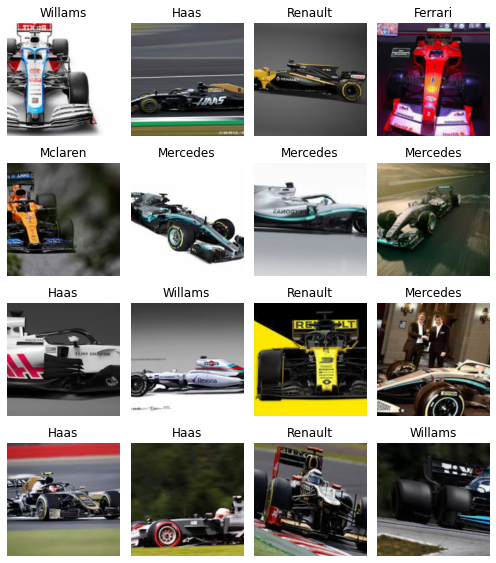

In [0]:
data.show_batch(rows=4, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
import warnings
warnings.filterwarnings('ignore')

epoch,train_loss,valid_loss,accuracy,time
0,2.798076,1.120650,0.609091,05:02
1,1.839847,0.649837,0.804545,00:21
2,1.305688,0.630878,0.836364,00:11
3,1.005454,0.560856,0.859091,00:11
4,0.809242,0.536724,0.859091,00:11
5,0.687931,0.526126,0.863636,00:11


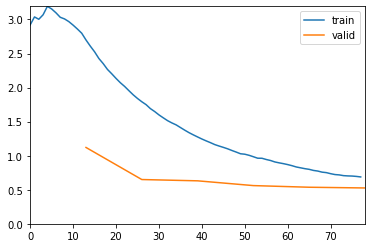

In [0]:
learn.fit_one_cycle(6)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


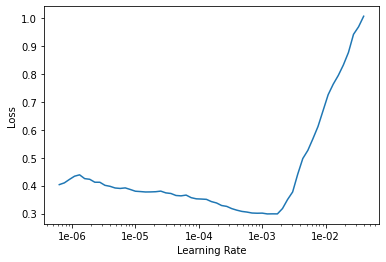

In [0]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.079508,0.196560,0.940909,00:11
1,0.059775,0.166231,0.945455,00:11
2,0.053873,0.196809,0.950000,00:11
3,0.049948,0.179484,0.950000,00:11
4,0.039888,0.174337,0.950000,00:11


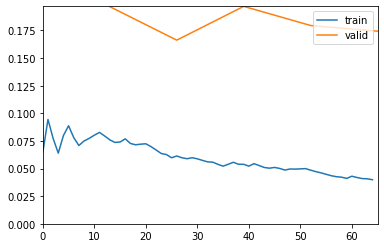

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-05,1e-03))

In [0]:
learn.save('/content/drive/My Drive/Colab Notebooks/Formula_1/models/stage-2')

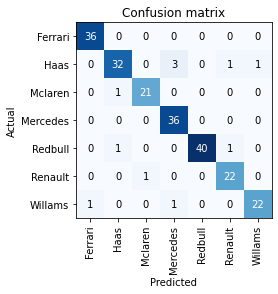

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/Formula_1/models/fastai_model.h5')

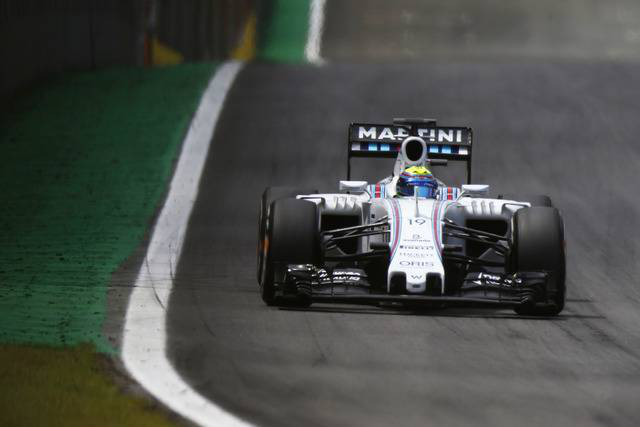

In [0]:
img = open_image('willams.jpeg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)


In [0]:
print(pred_class)

Willams
